In [1]:
import pandas as pd
import numpy as np

In [2]:
morador = pd.read_csv('morador_desp_indiv.csv')

pd.set_option('display.max_columns', 35)

morador.head()

#morador.shape

,UF,ESTRATO_POF,TIPO_SITUACAO_REG,COD_UPA,NUM_DOM,NUM_UC,COD_INFORMANTE,V0306,V0401,V04021,V04022,V04023,V0403,V0404,V0405,PESO,PESO_FINAL,RENDA_TOTAL,QUADRO,SEQ,V9001,V9002,V8000,V9010,V9011,V9012,V4104,V4105,DEFLATOR,V8000_DEFLA,COD_IMPUT_VALOR,FATOR_ANUALIZACAO
0,11,1101,1,110000016,2,1,1,1,1,15,7,1953,64.0,1,4,449.911506,690.883738,3855.34,29,37,2999901,1,150.0,NaN,NaN,NaN,NaN,NaN,1.000000,150.00,0,12
1,11,1101,1,110000016,2,1,2,2,1,1,12,1956,61.0,2,4,449.911506,690.883738,3855.34,42,9,4201001,1,120.0,NaN,NaN,NaN,NaN,NaN,0.989327,118.72,0,4
2,11,1101,1,110000016,2,1,3,6,1,16,12,1976,41.0,1,4,449.911506,690.883738,3855.34,24,5,2400601,1,20.0,NaN,NaN,NaN,NaN,NaN,NaN,19.91,0,52
3,11,1101,1,110000016,3,1,1,1,1,4,7,1980,37.0,2,4,449.911506,690.883738,4242.48,30,2,3000301,1,15.0,NaN,NaN,NaN,NaN,NaN,0.996543,14.95,0,12
4,11,1101,1,110000016,3,1,2,2,1,7,12,1977,40.0,1,4,449.911506,690.883738,4242.48,30,4,3000501,1,8.0,NaN,NaN,NaN,NaN,NaN,0.999273,7.99,0,12


#### Dropando variáveis que provavelmente não serão usadas

In [3]:
morador = morador.drop(['UF','TIPO_SITUACAO_REG', 'V0306', 'V0401', 'V04021', 'V04022','V04023', 'SEQ', 'DEFLATOR', 'COD_IMPUT_VALOR','PESO','V9002', 'V9010', 'V9011', 'V9012', 'V4104', 'V4105', 'V8000', 'FATOR_ANUALIZACAO'], axis=1)
# FATOR_ANUALIZACAO foi retirado após verificar que todas os itens da cesta de vestuário têm o mesmo fator 4 semanas

# V8000 foi retirada após verificar valores inconsistentes, os quais não presentes na V8000_DEFLA

morador.head(10)

,ESTRATO_POF,COD_UPA,NUM_DOM,NUM_UC,COD_INFORMANTE,V0403,V0404,V0405,PESO_FINAL,RENDA_TOTAL,QUADRO,V9001,V8000_DEFLA
0,1101,110000016,2,1,1,64.0,1,4,690.883738,3855.34,29,2999901,150.00
1,1101,110000016,2,1,2,61.0,2,4,690.883738,3855.34,42,4201001,118.72
2,1101,110000016,2,1,3,41.0,1,4,690.883738,3855.34,24,2400601,19.91
3,1101,110000016,3,1,1,37.0,2,4,690.883738,4242.48,30,3000301,14.95
4,1101,110000016,3,1,2,40.0,1,4,690.883738,4242.48,30,3000501,7.99
5,1101,110000016,4,1,1,65.0,2,4,690.883738,2669.57,29,2900301,79.99
6,1101,110000016,5,1,1,45.0,2,4,690.883738,12943.65,30,3001401,3.00
7,1101,110000016,5,1,2,30.0,1,1,690.883738,12943.65,30,3000801,10.50
8,1101,110000016,5,1,3,24.0,2,4,690.883738,12943.65,24,2400301,11.95
9,1101,110000016,5,1,4,20.0,2,1,690.883738,12943.65,30,3001801,7.00


#### Renomeando variáveis

In [5]:
morador = morador[morador['V9001'].isin(['3400101', '3400102', '3400103', '3400103', '3400104', '3400201','3400301','3400302','3400303','3400304','3400401','3400501','3400601','3400602','3400603','3400604','3400605','3400606','3400901','3401001','3401101','3401201','3401301','3401302','3401303','3401304','3401305','3401306','3401307','3401308','3401401','3401501','3401502','3401503','3401601','3401701','3401801','3401901','3402001','3402101','3402201','3402301','3402302','3402303','3402304','3402401','3402501','3402601','3402602','3402701','3402801','3402901','3403001','3500101','3500102','3500103','3500104','3500105','3500106','3500201','3500202','3500301','3500302','3500303','3500401','3500501','3500601','3500602','3500701','3500801','3500802','3500901','3501001','3501002','3501003','3501004','3501005','3501006','3501007','3501101','3501102','3501201','3501202','3501301','3501401','3501501','3501502','3501503','3501601','3501602','3501701','3501801','3501901','3501902','3501903','3501904','3501905','3501906','3501907','3501908','3502001','3502101','3502201','3502401','3502501','3502601','3502701','3502801','3502802','3502803','3502804','3502901','3502902','3502903','3503001','3503101','3503102','3503201','3503301','3503401','3503501','3503601','3503701','3503801','3504001','3504002','3504101','3504201','3504301','3504401','3504601','3600101','3600102','3600103','3600104','3600201','3600202','3600301','3600302','3600303','3600304','3600401','3600501','3600601','3600602','3600701','3600801','3600901','3601005','3601006','3601007','3601008','3601101','3601201','3601301','3601401','3601501','3601502','3601503','3601504','3601601','3601602','3601701','3601801','3601901','3601902','3601903','3601904','3601905','3601906','3602001','3602101','3602201','3602301','3602401','3602501','3602601','3602602','3602701','3602702','3602703','3602704','3603901','3604001','3604201','3604301','3604302','3604401','3604501','3604801','3604901','3800101','3800201','3800301','3800401','3800501','3800601','3800701','3800801','3800901','3800902','3801001','3801002','3801101','3801201','3801301','3801401','3801901','380200'])]

print(str('Número de linhas da base:'), len(morador['V9001']), 2*'\n')
print('Número de compras de cada item de vestuário: ')

# exibir todas as linhas pd.set_option('display.max_rows', 1000)
morador['V9001'].value_counts()

Número de linhas da base: 232529 


Número de compras de cada item de vestuário: 


3400101    22875
3500101    20782
3801001    14360
3800901    13050
3800101    11667
           ...  
3602702        1
3401305        1
3402201        1
3502903        1
3503201        1
Name: V9001, Length: 189, dtype: int64

#### Criando variáveis
##### Atenção! evitar rodar 2x esta linha pra não dar problema na renomeação dos estados

In [6]:
morador.rename(columns={'V0403':'IDADE', 'V0404' : 'SEXO', 'V9001':'PRODUTO', 'V0405':'RAÇA', 'V8000_DEFLA' : 'y'},inplace=True)
'''estados = {
    11:'Rondônia', 12:'Acre', 13:'Amazonas', 14:'Roraima', 15:'Pará', 16:'Amapá', 17:'Tocantins', 21:'Maranhão', 22:'Piauí', 23:'Ceará', 24:'Rio Grande do Norte', 25:'Paraíba', 26:'Pernambuco', 27:'Alagoas', 28:'Sergipe', 29:'Bahia', 31:'Minas Gerais', 32:'Espírito Santo', 33:'Rio de Janeiro', 35:'São Paulo', 41:'Paraná', 42:'Santa Catarina', 43:'Rio Grande do Sul', 50:'Mato Grosso do Sul', 51:'Mato Grosso', 52:'Goiás', 53:'Distrito Federal'
}

morador['UF'] = morador['UF'].map(estados)'''

#### Tabela filtrada só com dados de compra de produtos de vestuário
morador.head()

,ESTRATO_POF,COD_UPA,NUM_DOM,NUM_UC,COD_INFORMANTE,IDADE,SEXO,RAÇA,PESO_FINAL,RENDA_TOTAL,QUADRO,PRODUTO,y
11,1101,110000016,7,1,2,36.0,2,4,690.883738,6253.24,35,3500201,70.01
24,1101,110000016,12,1,3,14.0,2,4,690.883738,4353.51,36,3600101,10.10
26,1101,110000584,2,1,2,30.0,2,1,656.278135,3188.66,36,3600501,70.55
28,1101,110000584,3,1,2,46.0,2,4,656.278135,8165.33,38,3800201,194.55
51,1107,110000602,7,1,1,32.0,1,4,405.883748,1679.57,38,3801001,52.76


In [7]:
pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')

#### Analisando missing

In [7]:
#checar existência de missing, apenas idade
'''print(morador.isnull().any())
print(morador.isnull().sum())'''

'print(morador.isnull().any())\nprint(morador.isnull().sum())'

In [8]:
# Checando se há irregularidades com os valores de idade. Há muitos casos de crianças -- comprando roupa???
#morador['IDADE'].value_counts().sort_index()

In [8]:
# Dropando os 5 missing values
morador = morador.dropna()
morador.isnull().any()

ESTRATO_POF       False
COD_UPA           False
NUM_DOM           False
NUM_UC            False
COD_INFORMANTE    False
IDADE             False
SEXO              False
RAÇA              False
PESO_FINAL        False
RENDA_TOTAL       False
QUADRO            False
PRODUTO           False
y                 False
dtype: bool

#### OBS: outliers já são tratados pelo IBGE então não há necessidade

## Análise

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt 

#### Descritivas

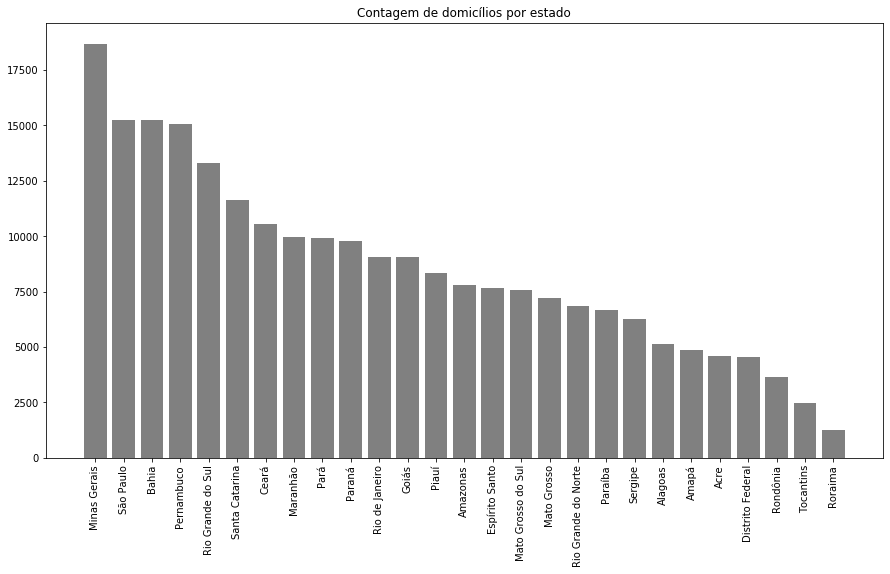

In [11]:
#plt.figure(figsize=(15,8))
#plt.xticks(rotation=90)
#plt.title('Contagem de domicílios por estado')
#graf = plt.bar(morador['UF'].value_counts().index, morador['UF'].value_counts().values, color="gray")

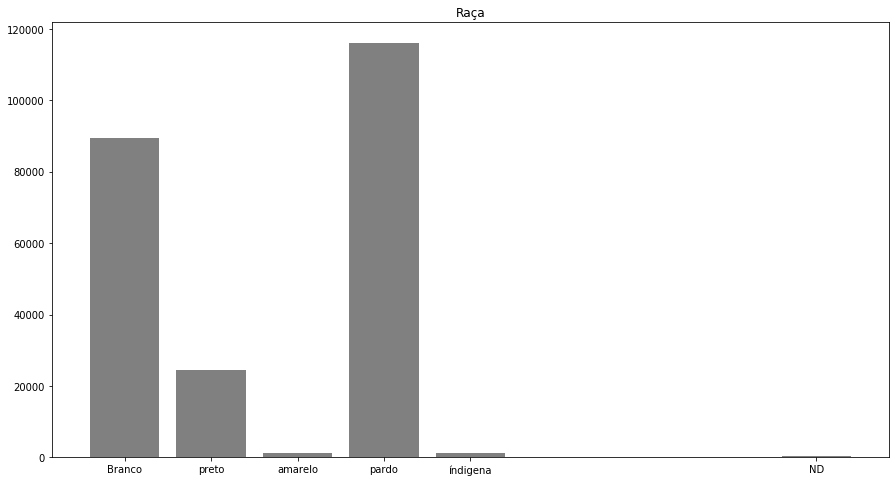

In [10]:
plt.figure(figsize=(15,8))
plt.title('Raça')
plt.xticks([1, 2, 3, 4, 5, 9], ['Branco', 'preto', 'amarelo', 'pardo', 'índigena', 'ND'])
graf = plt.bar(morador['RAÇA'].value_counts().index, morador['RAÇA'].value_counts().values, color="gray")

In [11]:
print('\nIDADE')
print('Média: ', round(morador['IDADE'].mean(), 2),'\nMediana: ', morador['IDADE'].median(), '\nDesvio Padrão: ', round(morador['IDADE'].std(), 2))

print('\nRENDA')
print('Média: ', round(morador['RENDA_TOTAL'].mean(), 2),'\nMediana: ', morador['RENDA_TOTAL'].median(), '\nDesvio Padrão: ', round(morador['RENDA_TOTAL'].std(), 2))

print('\nGASTO COM PRODUTOS DE VESTUÁRIO')
print('Média: ', morador['y'].mean(),'\nMediana: ', morador['y'].median(), '\nDesvio Padrão: ', morador['y'].std())


IDADE
Média:  39.06 
Mediana:  37.0 
Desvio Padrão:  16.17

RENDA
Média:  5812.02 
Mediana:  3727.8 
Desvio Padrão:  9335.84

GASTO COM PRODUTOS DE VESTUÁRIO
Média:  90.38533467513032 
Mediana:  60.12 
Desvio Padrão:  107.01070712559455


#### Codificação

In [13]:
X = pd.get_dummies(morador['SEXO'], prefix = 'SEXO')\
.join(pd.get_dummies(morador['RAÇA'], prefix = 'RAÇA'))\
.join(morador['IDADE'])\
.join(morador['RENDA_TOTAL'])\
.join(morador['y'])
#.join(pd.get_dummies(morador['UF'], prefix = 'UF'))\
X.head()

,SEXO_1,SEXO_2,RAÇA_1,RAÇA_2,RAÇA_3,RAÇA_4,RAÇA_5,RAÇA_9,IDADE,RENDA_TOTAL,y
11,0,1,0,0,0,1,0,0,36.0,6253.24,70.01
24,0,1,0,0,0,1,0,0,14.0,4353.51,10.10
26,0,1,1,0,0,0,0,0,30.0,3188.66,70.55
28,0,1,0,0,0,1,0,0,46.0,8165.33,194.55
51,1,0,0,0,0,1,0,0,32.0,1679.57,52.76


#### Construindo o modelo

In [14]:
y = X['y']
X = X.loc[:, X.columns != 'y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
model = LinearRegression()
_ = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('\nErro Médio Quadrático (MSE): ', mean_squared_error(y_test, y_pred), '\n\nRaiz do Erro Médio Quadrático (RMSE): ', np.sqrt(mean_squared_error(y_test, y_pred)), '\n\nErro Médio Absoluto (MAE): ', mean_absolute_error(y_test, y_pred), '\n\nR_squared: ', r2_score(y_test, y_pred),'\n')


Erro Médio Quadrático (MSE):  10440.897557968656 

Raiz do Erro Médio Quadrático (RMSE):  102.18071030272131 

Erro Médio Absoluto (MAE):  60.51300834043541 

R_squared:  0.06001042219067665 



In [16]:
# obtendo o slope
print('\nSlope: \n', model.intercept_, '\n\n')

# obtendo os coeficientes em notação científica:
#print('Coefficients: \n', model.coef_, '\n')

# obtendo os coeficientes em float
coefs = model.coef_
coefs_convert = pd.DataFrame(coefs)
print('\nCOEFICIENTES: \n', round(coefs_convert, 5))



Slope: 
 83.3403597178671 



COEFICIENTES: 
           0
0   3.51654
1  -3.51654
2   5.68404
3  -9.83752
4  18.66956
5  -9.77251
6  -9.34641
7   4.60284
8  -0.01540
9   0.00211


In [17]:
# Obtendo as colunas pra entender os coeficientes
cont=0
for col in X.columns: 
    print(cont, '', end='')
    cont +=1
    print(col) 

0 SEXO_1
1 SEXO_2
2 RAÇA_1
3 RAÇA_2
4 RAÇA_3
5 RAÇA_4
6 RAÇA_5
7 RAÇA_9
8 IDADE
9 RENDA_TOTAL


#### Gráfico ruim. Ignorar!

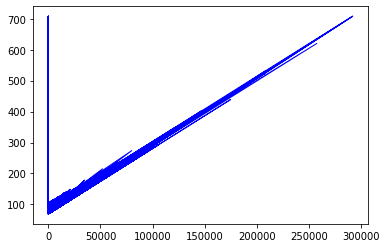

In [18]:
#plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=1)

plt.show()